# ---------------Task 1---------------

## Q1: 
    calculate the average image of the 10 noisy images and display the result.
       
    Also answer the following questions in your notebook

## 1.1 program

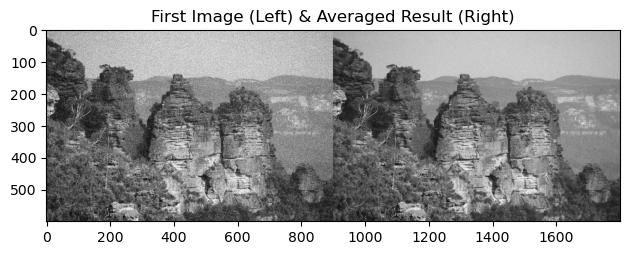

In [ ]:
import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt

# path noisy image
ImageFile = glob.glob("images/*.jpg")[:10]

# read image
FirstImg = cv2.imread(ImageFile[0])
AverageImg = np.zeros_like(FirstImg, dtype=np.float32)

# accumulate images
for filename in ImageFile:
    img = cv2.imread(filename).astype(np.float32)
    AverageImg += img / len(ImageFile)  # divide incrementally
AverageImg = np.clip(AverageImg, 0, 255).astype(np.uint8)

# comparison
comparison = np.hstack((FirstImg, AverageImg))
ComparisonRGB = cv2.cvtColor(comparison, cv2.COLOR_BGR2RGB)

# show result
plt.imshow(ComparisonRGB)
plt.title("First Image (Left) & Averaged Result (Right)")
plt.tight_layout()
plt.show()


In [ ]:
# save the averaged image
cv2.imwrite("average result.jpg", AverageImg)

True

## Q2: 
    Theoretically, how much noise reduction should you be able to achieve this way? That is, by what factor should the standard deviation of the noise drop.

## A2: 
	The noise average of each image is the same, assuming the variance is S, then after averaging the 10 images pixel by pixel:. 
	    
	final S = S/[(10)^(1/2)] = 0.316 S.  
	   
	That is, the noise is reduced to about 1/3 of the original.  

## Q3: 
    Practically, how much noise reduction did you actually achieve here? Note that this require measuring the standard deviation of the pixel values within a region containing only random noise and no other image structures. The best region for this is the sky.  
       
    Measure the standard deviation within some rectangular region in the sky in one of the single noisy images and within the same region in the averaged image.  Report the two standard deviations and the ratio of the former to the latter.  

## 1.3 program

In [21]:
# measure h,w,c
h, w, c = FirstImg.shape

# select sky region
RegFirst = FirstImg[0:140, w-140:w]
RegAverage = AverageImg[0:140, w-140:w]

# return grey
RegFirstGray = cv2.cvtColor(RegFirst, cv2.COLOR_BGR2GRAY)
RegAverageGray   = cv2.cvtColor(RegAverage, cv2.COLOR_BGR2GRAY)

# calculate
CalFirst = np.std(RegFirstGray)
CalAverage   = np.std(RegAverageGray)
ratio     = CalFirst / CalAverage if CalAverage > 0 else np.inf

# print
print(f"The standard deviation of the rectangular region of a SINGLE noise image: {CalFirst:.2f}")
print()
print(f"The standard deviation of the rectangular region of a AVERAGE noise image: {CalAverage:.2f}")
print()
print(f"ratio of the former to the latter: {ratio:.2f}")

The standard deviation of the rectangular region of a SINGLE noise image: 25.34

The standard deviation of the rectangular region of a AVERAGE noise image: 9.44

ratio of the former to the latter: 2.68


# ------------Task 2---------------

## Q1:
Take your average image from Task 1 and calculate its DoG-filtered version using the two different approaches. Keep in mind that either approach involves subtraction, and thus the resulting pixel values could be positive or negative, so make sure to use data types that can handle this correctly. In your notebook, display the result images of the two different DoG-filtering approaches. Also answer the following questions in your notebook.


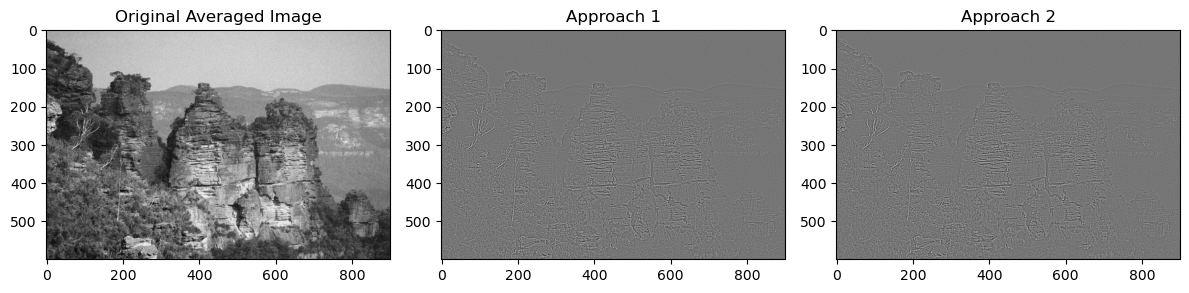

True

In [29]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time

# load averaged image
img = cv2.imread("average result.jpg", cv2.IMREAD_GRAYSCALE)

# define gaussian kernels
h1 = (1/16) * np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 2, 1, 0],
    [0, 2, 4, 2, 0],
    [0, 1, 2, 1, 0],
    [0, 0, 0, 0, 0]
], dtype=np.float32)

h2 = (1/256) * np.array([
    [1, 4,  6,  4,  1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4,  6,  4,  1]
], dtype=np.float32)

# Approach 1: directly kernel
start1 = time.time()
DoGKernel = h1 - h2
DoG1 = cv2.filter2D(img.astype(np.float32), -1, DoGKernel)
end1 = time.time()


# Approach 2: Separate convolutions then subtract
start2 = time.time()
ConvH1 = cv2.filter2D(img.astype(np.float32), -1, h1)
ConvH2 = cv2.filter2D(img.astype(np.float32), -1, h2)
DoG2 = ConvH1 - ConvH2
end2 = time.time()

# Result normalize
def normalize(img):
    return cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
DoG1Disp = normalize(DoG1)
DoG2Disp = normalize(DoG2)

# Results
plt.figure(figsize=(12, 5))

plt.subplot(1, 3, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Averaged Image")

plt.subplot(1, 3, 2)
plt.imshow(DoG1Disp, cmap='gray')
plt.title("Approach 1")

plt.subplot(1, 3, 3)
plt.imshow(DoG2Disp, cmap='gray')
plt.title("Approach 2")

plt.tight_layout()
plt.show()

# save the Approach 1 image
cv2.imwrite("gaussian result.jpg", DoG1Disp)

## Q2:
Which of the two approaches is computationally faster? And why?

In [23]:
# Print timing result
print(f"Approach 1 time spend: {(end1 - start1)*1000:.2f} ms")
print(f"Approach 2 time spend: {(end2 - start2)*1000:.2f} ms")

Approach 1 time spend: 1.63 ms
Approach 2 time spend: 3.06 ms


## A2:
Approach 2(convolve the image 𝑓𝑓 with ℎ1, and separately with ℎ2, and then subtract the two resulting filtered images to get 𝑔)is slower than Approach 1.   
Because approach 1 only needs to do one convolutional operation, while approach 2 needs to do it twice.

## Q3:
Are the corresponding pixel values in the two result images exactly the same? In other words, if you subtract the two images, is the result 0 everywhere? If not, why not?

In [25]:
# Compute difference
diffence = DoG1 - DoG2

# Is equal?
equal = np.all(diffence == 0)


print(f"Are the two results exactly the same? {equal}")
print(f"differences",diffence)

Are the two results exactly the same? True
differences [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# ------------Task 3---------------

## Q1
Take one of the DoG-filtered images from Task 2 (it does not matter which one) and multiply it with a factor of 5. Then add the resulting image to your average image from Task 1.
You may need to adjust the brightness/contrast of the final image a bit to make the intensities look similar to those of the average image from Task 1.
Visually comparing the output image of Task 3 with the output image of Task 1.

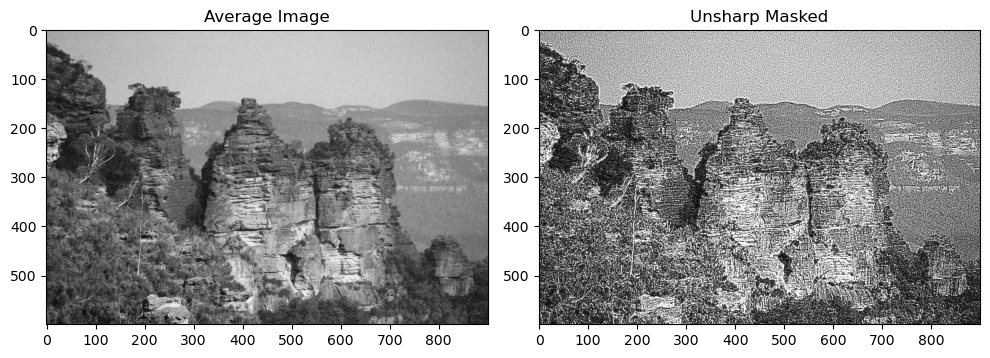

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load img
AvgImg = cv2.imread("average result.jpg", cv2.IMREAD_GRAYSCALE)
DoGImg = cv2.imread("gaussian result.jpg", cv2.IMREAD_GRAYSCALE)

# float convert
AvgFloat = AvgImg.astype(np.float32)
DoGFloat = DoGImg.astype(np.float32)

# unsharp masking
factor = 5.0
sharpened = AvgFloat + factor * DoGFloat

# change brightness & contrast
a = 1.0   
b = -600    

adjusted = cv2.convertScaleAbs(sharpened, alpha=a, beta=b)

# show result
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(AvgImg, cmap='gray')
plt.title("Average Image")

plt.subplot(1, 2, 2)
plt.imshow(adjusted, cmap='gray')
plt.title("Unsharp Masked")

plt.tight_layout()
plt.show()

## Q2
what else has been amplified in the output image of Task 3, which we were trying to get rid of in Task 1

## A2
In Task 3, the image noise were also amplified.

## Q3
what is the theoretical explanation for why this happens? Hint: the DoG filter is an approximation of the (inverted) Laplacean filter.

## A3
The DoG filter is an approximation of the inverted Laplacean filter. Because: 
Reason1: The role of Laplace/DoG is to highlight the second-order changes in the image, that is, the rapidly changing intensity region. 
Reason2: The edges are fast-changing regions, so enhanced; but the noise which appears at the pixel level also as high-frequency rapid changes, so it is emphasized like the edges.
So, when the result is multiplied by 5 and added back to the image, the noise is enhanced in addition to the sharpness of the edges.